Tu będzie model

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14730607271353868844
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9009321514579612815
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [1]:
import glob
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4516160454911832981
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11276409630930169810
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [114]:
df = pd.DataFrame.from_csv(path='G://TEST TEST TEST/2/info.txt', sep=';', index_col = None, header = None)
df.columns = ['name','number']

df['number'] = df.number.astype(str)
df.head()
                      
dftest = pd.DataFrame.from_csv(path='G://TEST TEST TEST/2check/info.txt', sep=';', index_col = None, header = None)
dftest.columns = ['name','number']
dftest['number'] = dftest.number.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


In [0]:
#labels_test = keras.utils.to_categorical(df.number[:100])
#labels_train = keras.utils.to_categorical(df.number[101:])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

In [116]:
imagedata = datagen.flow_from_dataframe(dataframe = df, directory='G://TEST TEST TEST/2/', x_col = 'name', y_col = 'number', target_size = (112,112), class_mode = 'binary')
testdata = datagen.flow_from_dataframe(dataframe = df, directory='G://TEST TEST TEST/2check', x_col = 'name', y_col = 'number', target_size = (112,112), class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), input_shape = (112, 112, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
model.add(Dense(256, activation = 'relu'))

model.add(Dense(2, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'] )



In [0]:
model = Sequential() #VGGNet 19
model.add(Convolution2D(64, kernel_size = (3, 3), activation='relu', input_shape=(112, 112, 3)))
model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(256, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(256, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
#model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
#model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'] )

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit_generator(imagedata, epochs = 20, steps_per_epoch = 100, validation_data = testdata, validation_steps = 10)

Epoch 1/20
100/100 [==============================] - 21s 205ms/step - loss: 7.6220 - acc: 0.5197 - val_loss: 6.3149 - val_acc: 0.6061
Epoch 2/20
100/100 [==============================] - 15s 149ms/step - loss: 7.7248 - acc: 0.5181 - val_loss: 6.5208 - val_acc: 0.5932
Epoch 3/20
100/100 [==============================] - 16s 162ms/step - loss: 7.7892 - acc: 0.5141 - val_loss: 6.6185 - val_acc: 0.5871
Epoch 4/20
100/100 [==============================] - 15s 152ms/step - loss: 7.8399 - acc: 0.5109 - val_loss: 6.7925 - val_acc: 0.5763
Epoch 5/20
100/100 [==============================] - 16s 160ms/step - loss: 7.6899 - acc: 0.5203 - val_loss: 6.3757 - val_acc: 0.6023
Epoch 6/20
100/100 [==============================] - 17s 167ms/step - loss: 7.7247 - acc: 0.5181 - val_loss: 6.5887 - val_acc: 0.5890
Epoch 7/20
100/100 [==============================] - 16s 155ms/step - loss: 7.7499 - acc: 0.5165 - val_loss: 6.6793 - val_acc: 0.5833
Epoch 8/20
100/100 [==============================] - 1

In [0]:
#tf.reset_default_graph()

In [0]:
model.evaluate_generator(testdata, steps = 100)

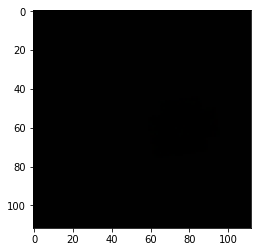

[0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0.]


In [121]:
import matplotlib.pyplot as plt    #Coś jest nie tak z wyciąganiem obrazków do generatora.
x,y = imagedata.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image.astype('uint8'))
    plt.show()
    print(y)
